[View in Colaboratory](https://colab.research.google.com/github/orico/UnitTestAndDecoratorLogger/blob/master/Q2_Final.ipynb)

1. The task is to write a system that predicts the next day price.
2. Below 10 products and their historical prices. 
3. Please also add automatic test for this problem using this data set and the results. 
4. The results - the next day price of each product is also given to use in tests. 
5. We do not expect to get to this precise number, but to be close enough....



In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unittest
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
# Decorators
from functools import wraps


def my_logger(orig_func):
    import logging
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            '\nRan with args: {}, and kwargs: {}\n'.format(args, kwargs))
        return orig_func(*args, **kwargs)

    return wrapper


def my_timer(orig_func):
    import time

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('\n{} ran in: {} sec\n'.format(orig_func.__name__, t2))
        return result

    return wrapper

In [0]:
dates = ['1901-01-01','1901-01-02','1901-01-03','1901-01-04','1901-01-05','1901-01-06','1901-01-07','1901-01-08','1901-01-09','1901-01-10',
         '1901-01-11','1901-01-12','1901-01-13','1901-01-14','1901-01-15','1901-01-16','1901-01-17','1901-01-18','1901-01-19','1901-01-20',
         '1901-01-21','1901-01-22','1901-01-23','1901-01-24','1901-01-25','1901-01-26','1901-01-27','1901-01-28','1901-01-29','1901-01-30']

@my_logger
@my_timer
def productResults():
  print('\nproductResults ran\n')
  p1 = [12181,18456,15368,8953,10306,18352,16162,16627,15632,13525,8882,9285,17315,17054,17035,16373,14914,9415,10408,17892,17721,18665,16316,14331,8710,9353,17621,19662,18503,17738]
  p2 = [15988,23646,23029,23255,21660,22639,20418,17606,31214,32611,29834,27416,23380,23550,20950,25477,22376,17316,16298,24809,30444,22871,31241,26043,13331,19041,24609,24226,21177,26686]
  p3 = [31977,26428,30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316]
  p4 = [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 3038849, 2927795, 2905299, 3095273, 3151996, 3254533, 3262962, 3151966, 3026427, 3080692, 3296611, 3247278, 3326148, 3283342, 3069545]
  p5 = [41859, 65940, 67030, 62422, 67050, 101295, 84666, 64875, 48534, 49837, 40181, 41382, 45182, 33426, 31895, 28434, 27127, 22424, 23278, 29411, 27520, 26455, 27840, 25434, 19032, 17649,22272,21714,20599,22644]
  p6 = [14586,15045,14418,15487,8442,6102,7346,6435,10563,9260,7427,8763,32612,43362,33552,34764,22582,25999,32613,28931,30697,28922,21549,33951,41149,31534,32633,31538,27217,28363]
  p7 = [24159,21502,23526,28600,28255,28431,30295,29082,22989,24346,28906,27842,26519,27036,25793,22421,24309,26845,25246,28104,29814,28303,24059,27514,32436,30657,31052,32093,28165,22874]
  p8 = [268761,226644,202903,201372,191240,198024,267412,289817,233144,210205,178994,155626,248158,252471,291896,301777,217711,200980,185491,183430,215310,227871,182765,168251,154917,143351,133672,165432,184370,158707]
  p9 = [305612,302201,279930,260691,217624,160977,215527,284858,266054,257197,243647,200695,147070,196671,252610,245556,249167,235139,207565,146888,176367,232367,212906,190481,173051,149319,110361,138222,193611,180049]
  p10 = [176704,237519,219852,211973,202701,175408,139700,191837,243161,237931,219984,194502,165109,133597,194239,220393,209988,201083,190071,155357,130214,185792,221262,210200,199335,186937,155093,133439,186395,215085]

  products = [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]

  results = [13019,26266,40993,3005058,22685,33372,25496,145638,166472,201760]

  return products, results


@my_logger
@my_timer
def statistics(products):
  print('\nstatistics ran with arguments ({})\n'.format(products))
  stats = []
  for product in products:
    stat = len(product), np.sum(product), np.mean(product), np.std(product)
    stats.append(stat)
    print('\n',stat)
  return stats


@my_logger
@my_timer
def plotHistograms(products):
  print('\nplotHistograms ran with arguments ({})\n'.format(products))
  for product in products:
    plt.hist(product)
    plt.show()
    plt.plot(product)
    plt.show()

@my_logger
@my_timer
def calc(finalResults, results, stats):
  print('\ncalc ran with arguments ({}, {}, {})\n'.format(finalResults, results, stats))
  smallerThanSTDs = []
  for i, finalResult in enumerate(finalResults):
    absdiff = int(np.abs(finalResult - results[i]))
    stdev = stats[i][3]
    smallerThanSTD = absdiff <= stdev
    print(i,'is Y^-Y smaller than STD?',smallerThanSTD,'absdiff:', absdiff,'stdev:', stdev)
    smallerThanSTDs.append(smallerThanSTD)
  return smallerThanSTDs


In [0]:
class TheModel(object):
  
    verbose = 1
    
    @my_logger
    @my_timer
    def __init__(self, verbose):
      self.verbose = verbose
          
    @my_logger
    @my_timer
    def fit(self, AR, X, validation):
      print('\nfit ran with arguments ({}, {})\n'.format(AR, X))
      series =  pd.DataFrame(X, columns=['p1'])
      series.index = dates
      series.index = pd.to_datetime(series.index)
      series['p1'] = pd.to_numeric(series['p1'], downcast='float') 
      if self.verbose == 1:
        series.plot()
        plt.show()

        autocorrelation_plot(series)
        plt.show()

      X = series.values       
      
      if validation == True:
        size = 20
        train,  val = X[:size], X[size:]
        history = [x for x in train]
        predictions = list()  

        for t, v in enumerate(val): 
          model = ARIMA(history, order=(AR,1,0))
          self.model_fit = model.fit(disp=0)
          yhat = self.model_fit.forecast()[0] 
          predictions.append(yhat)
          obs = val[t]                 
          history.append(obs)
          if self.verbose == 1:
            print('predicted=%f, expected=%f' % (yhat, obs)) 
      else:
          history = X
      
      #the last step is to always train on all the data
      model = ARIMA(history, order=(AR,1,0))
      self.model_fit = model.fit(disp=0)
      if self.verbose == 1:
        print('predicted', self.model_fit.forecast()[0]) 
      

      if self.verbose == 1:
        print(self.model_fit.summary())

      # plot residual errors
      residuals = pd.DataFrame(self.model_fit.resid)
      if self.verbose == 1:
        residuals.plot()
        plt.show()
        residuals.plot(kind='kde')
        plt.show()
        print(residuals.describe())

      if self.verbose == 1 and validation == True:
    #    error = mean_squared_error(val, predictions)
    #    print('Test MSE: %.3f' % error)
        # plot
        plt.plot(val)
        plt.plot(predictions, color='red')
        plt.show()
      print('\n====================================================================================================\n')
      return self.model_fit

    @my_logger
    @my_timer
    def predict(self): 
      print('\npredict ran')
      output = self.model_fit.forecast()
      if self.verbose == 1:  
        print('predicted future value=%f' % (output[0]))
        print('')
      return int(output[0])   

In [5]:
class TestInput(unittest.TestCase):
  
    @classmethod
    def setUpClass(cls):
#         print('setupClass')
        pass

    @classmethod
    def tearDownClass(cls): 
#         print('teardownClass')
        pass

    def setUp(self):
        print('setUp')
        self.products = [[12181, 18456, 15368, 8953, 10306, 18352, 16162, 16627, 15632, 13525, 8882, 9285, 17315, 17054, 17035, 16373, 14914, 9415, 10408, 17892, 17721, 18665, 16316, 14331, 8710, 9353, 17621, 19662, 18503, 17738],
                    [15988, 23646, 23029, 23255, 21660, 22639, 20418, 17606, 31214, 32611, 29834, 27416, 23380, 23550, 20950, 25477, 22376, 17316, 16298, 24809, 30444, 22871, 31241, 26043, 13331, 19041, 24609, 24226, 21177, 26686],
                    [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316],
                    [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 3038849, 2927795, 2905299, 3095273, 3151996, 3254533, 3262962, 3151966, 3026427, 3080692, 3296611, 3247278, 3326148, 3283342, 3069545],
                    [41859, 65940, 67030, 62422, 67050, 101295, 84666, 64875, 48534, 49837, 40181, 41382, 45182, 33426, 31895, 28434, 27127, 22424, 23278, 29411, 27520, 26455, 27840, 25434, 19032, 17649, 22272, 21714, 20599, 22644],
                    [14586, 15045, 14418, 15487, 8442, 6102, 7346, 6435, 10563, 9260, 7427, 8763, 32612, 43362, 33552, 34764, 22582, 25999, 32613, 28931, 30697, 28922, 21549, 33951, 41149, 31534, 32633, 31538, 27217, 28363],
                    [24159, 21502, 23526, 28600, 28255, 28431, 30295, 29082, 22989, 24346, 28906, 27842, 26519, 27036, 25793, 22421, 24309, 26845, 25246, 28104, 29814, 28303, 24059, 27514, 32436, 30657, 31052, 32093, 28165, 22874],
                    [268761, 226644, 202903, 201372, 191240, 198024, 267412, 289817, 233144, 210205, 178994, 155626, 248158, 252471, 291896, 301777, 217711, 200980, 185491, 183430, 215310, 227871, 182765, 168251, 154917, 143351, 133672, 165432, 184370, 158707],
                    [305612, 302201, 279930, 260691, 217624, 160977, 215527, 284858, 266054, 257197, 243647, 200695, 147070, 196671, 252610, 245556, 249167, 235139, 207565, 146888, 176367, 232367, 212906, 190481, 173051, 149319, 110361, 138222, 193611, 180049],
                    [176704, 237519, 219852, 211973, 202701, 175408, 139700, 191837, 243161, 237931, 219984, 194502, 165109, 133597, 194239, 220393, 209988, 201083, 190071, 155357, 130214, 185792, 221262, 210200, 199335, 186937, 155093, 133439, 186395, 215085]
                    ]
        self.results = [13019, 26266, 40993, 3005058, 22685, 33372, 25496, 145638, 166472, 201760]
        self.statistics = [(30, 442755, 14758.5, 3577.1019345274467), (30, 703141, 23438.033333333333, 4697.761938649321), (30, 1034329, 34477.63333333333, 4484.658191979505), (30, 96879394, 3229313.1333333333, 215886.3940566478),
                                (30, 1207407, 40246.9, 21041.77892249924), (30, 685842, 22861.4, 11244.981217117853), (30, 811173, 27039.1, 2918.7904726672887), (30, 6240702, 208023.4, 44571.75808782956),
                                (30, 6432413, 214413.76666666666, 50295.37056806411), (30, 5744861, 191495.36666666667, 31246.922644727038)]
        self.finalResults = [18204, 27195, 42122, 3164444, 22037, 30183, 24268, 143519, 141671, 201093] 
        self.AR = [3,3,3,3,3,3,3,3,3,3]
        self.smallerThanSTDs = [False, True, True, True, True, True, True, True, True, True]  

    def tearDown(self):
        print('tearDown\n')
        
    def test_productResults(self):
        self.assertEqual(productResults(), (self.products, self.results)) 

    def test_statistics(self):
        self.assertEqual(statistics(self.products), self.statistics)
    
    def test_fit_predict(self):
        for i, product in enumerate(self.products):
          arm = TheModel(0)
          arm.fit(self.AR[i], product, False)
          self.assertEqual(arm.predict(), self.finalResults[i])    

              
    def test_calc(self):
        self.assertEqual(calc(self.finalResults, self.results, self.statistics), self.smallerThanSTDs)
      
if __name__ == '__main__':
  
    #run tests 
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    

.

setUp

calc ran with arguments ([18204, 27195, 42122, 3164444, 22037, 30183, 24268, 143519, 141671, 201093], [13019, 26266, 40993, 3005058, 22685, 33372, 25496, 145638, 166472, 201760], [(30, 442755, 14758.5, 3577.1019345274467), (30, 703141, 23438.033333333333, 4697.761938649321), (30, 1034329, 34477.63333333333, 4484.658191979505), (30, 96879394, 3229313.1333333333, 215886.3940566478), (30, 1207407, 40246.9, 21041.77892249924), (30, 685842, 22861.4, 11244.981217117853), (30, 811173, 27039.1, 2918.7904726672887), (30, 6240702, 208023.4, 44571.75808782956), (30, 6432413, 214413.76666666666, 50295.37056806411), (30, 5744861, 191495.36666666667, 31246.922644727038)])

0 is Y^-Y smaller than STD? False absdiff: 5185 stdev: 3577.1019345274467
1 is Y^-Y smaller than STD? True absdiff: 929 stdev: 4697.761938649321
2 is Y^-Y smaller than STD? True absdiff: 1129 stdev: 4484.658191979505
3 is Y^-Y smaller than STD? True absdiff: 159386 stdev: 215886.3940566478
4 is Y^-Y smaller than STD? True a

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):





fit ran in: 0.12786507606506348 sec


predict ran

predict ran in: 0.0007472038269042969 sec


__init__ ran in: 1.1920928955078125e-06 sec


fit ran with arguments (3, [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316])




fit ran in: 0.154921293258667 sec


predict ran

predict ran in: 0.0007107257843017578 sec


__init__ ran in: 1.1920928955078125e-06 sec


fit ran with arguments (3, [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 3038849, 2927795, 2905299, 3095273, 3151996, 3254533, 3262962, 3151966, 3026427, 3080692, 3296611, 3247278, 3326148, 3283342, 3069545])




fit ran in: 0.22655558586120605 sec


predict ran

predict ran in: 0.0008122920989990234 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [41859

...




fit ran in: 0.17687201499938965 sec


predict ran

predict ran in: 0.0009219646453857422 sec

tearDown

setUp

productResults ran


productResults ran in: 0.0002853870391845703 sec

tearDown

setUp

statistics ran with arguments ([[12181, 18456, 15368, 8953, 10306, 18352, 16162, 16627, 15632, 13525, 8882, 9285, 17315, 17054, 17035, 16373, 14914, 9415, 10408, 17892, 17721, 18665, 16316, 14331, 8710, 9353, 17621, 19662, 18503, 17738], [15988, 23646, 23029, 23255, 21660, 22639, 20418, 17606, 31214, 32611, 29834, 27416, 23380, 23550, 20950, 25477, 22376, 17316, 16298, 24809, 30444, 22871, 31241, 26043, 13331, 19041, 24609, 24226, 21177, 26686], [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316], [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 


----------------------------------------------------------------------
Ran 4 tests in 1.736s

OK



productResults ran


productResults ran in: 0.0003952980041503906 sec

[[12181, 18456, 15368, 8953, 10306, 18352, 16162, 16627, 15632, 13525, 8882, 9285, 17315, 17054, 17035, 16373, 14914, 9415, 10408, 17892, 17721, 18665, 16316, 14331, 8710, 9353, 17621, 19662, 18503, 17738], [15988, 23646, 23029, 23255, 21660, 22639, 20418, 17606, 31214, 32611, 29834, 27416, 23380, 23550, 20950, 25477, 22376, 17316, 16298, 24809, 30444, 22871, 31241, 26043, 13331, 19041, 24609, 24226, 21177, 26686], [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316], [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 3038849, 2927795, 2905299, 3095273, 3151996, 3254533, 3262962, 3151966, 3026427, 3080692, 3296611, 3247278, 3326148, 3283342, 3069545], [41859, 65940, 67030, 624

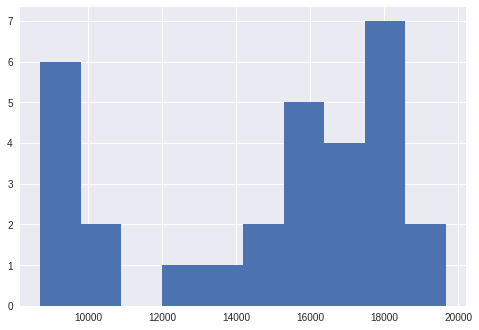

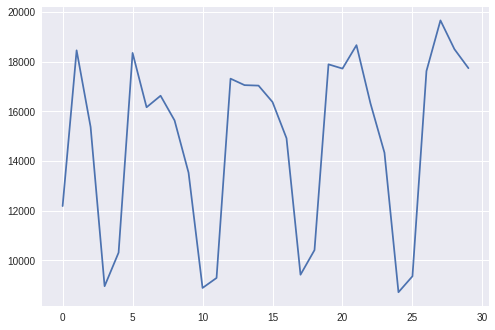

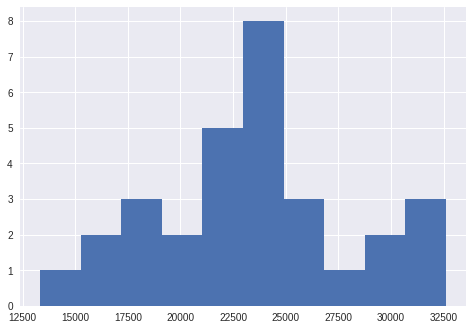

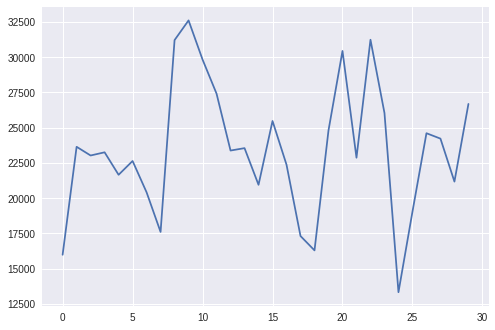

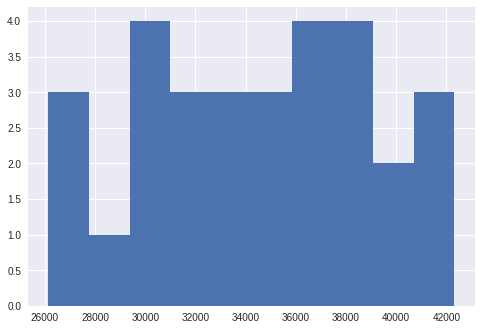

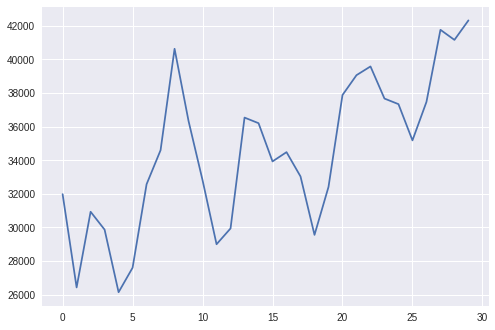

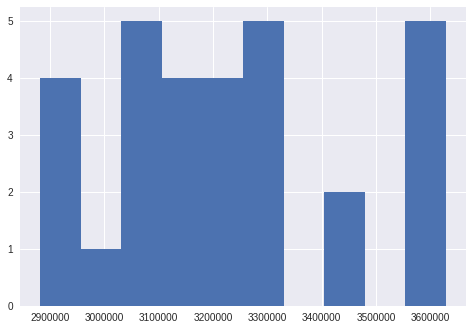

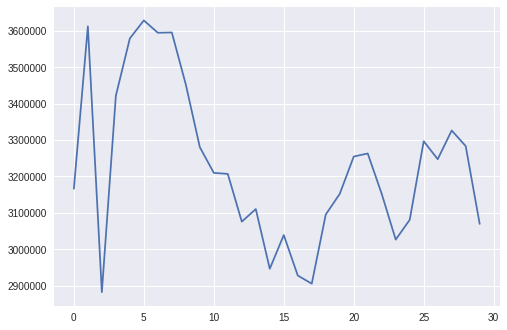

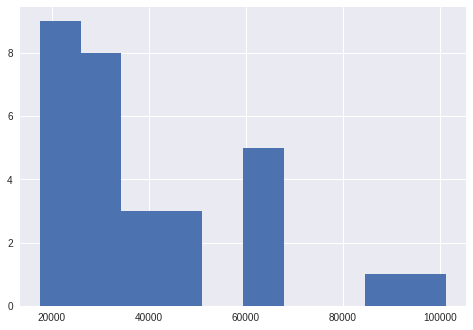

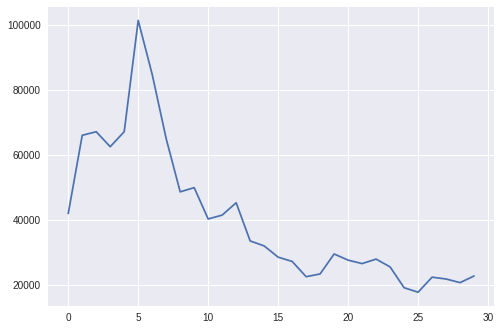

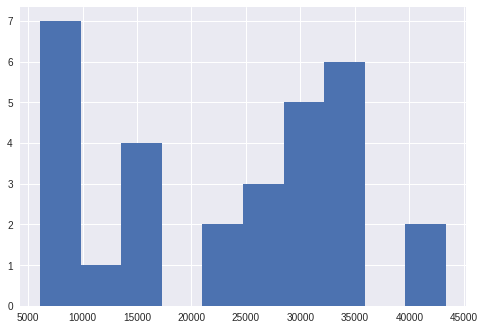

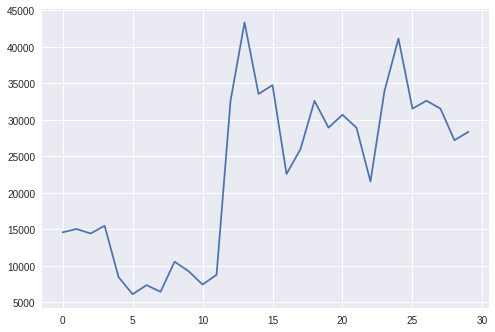

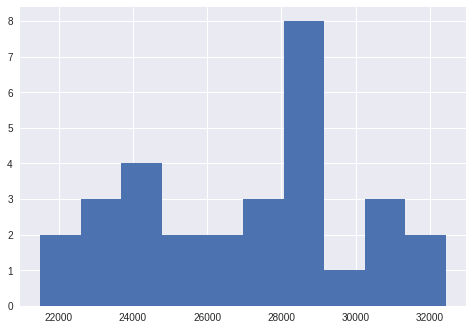

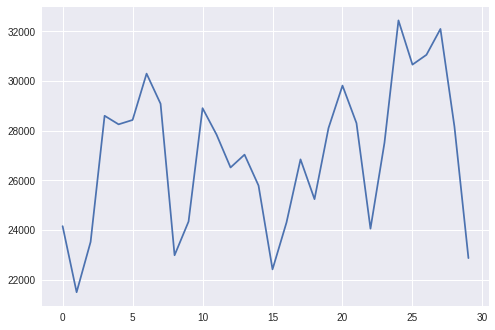

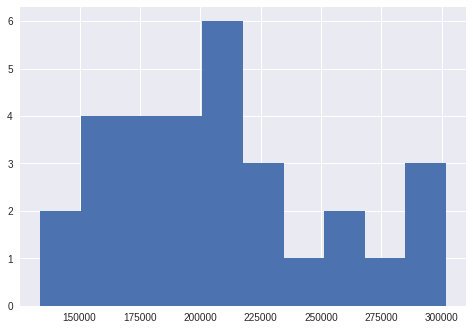

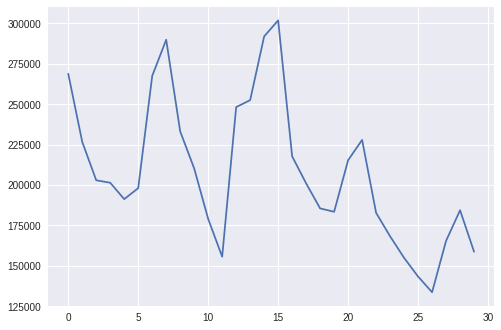

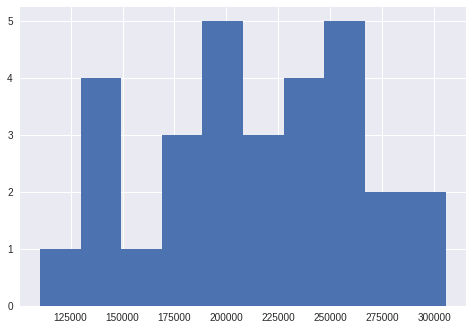

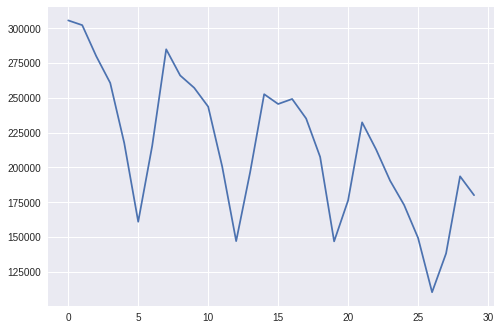

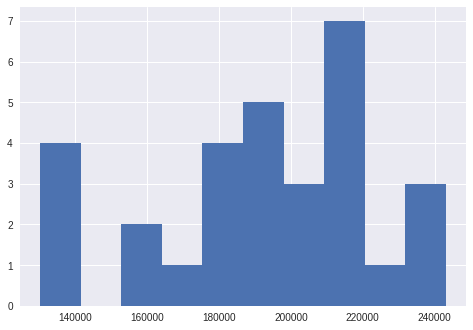

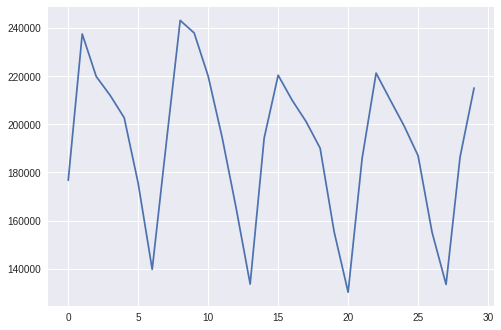


plotHistograms ran in: 3.3010029792785645 sec


__init__ ran in: 2.6226043701171875e-06 sec


fit ran with arguments (3, [12181, 18456, 15368, 8953, 10306, 18352, 16162, 16627, 15632, 13525, 8882, 9285, 17315, 17054, 17035, 16373, 14914, 9415, 10408, 17892, 17721, 18665, 16316, 14331, 8710, 9353, 17621, 19662, 18503, 17738])



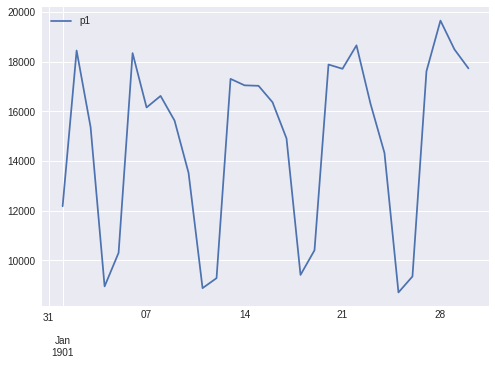

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


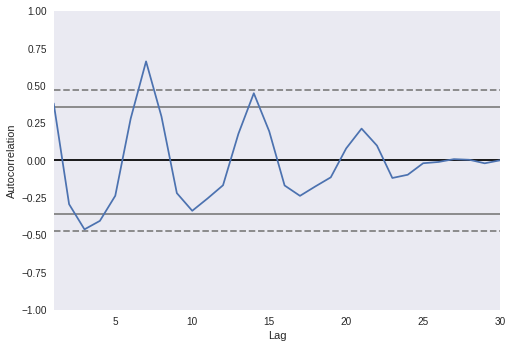

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted [18204.2741931]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -277.285
Method:                       css-mle   S.D. of innovations           3399.911
Date:                Wed, 02 May 2018   AIC                            564.569
Time:                        05:00:27   BIC                            571.406
Sample:                             1   HQIC                           566.710
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        211.1277    416.463      0.507      0.617    -605.124    1027.380
ar.L1.D.y      0.0671      0.186      0.362      0.721      -0.297       0.431
ar.L2.D.y     -0.4624     

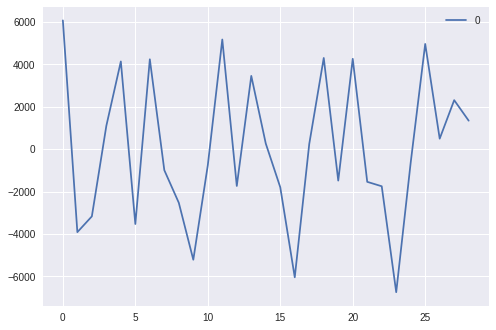

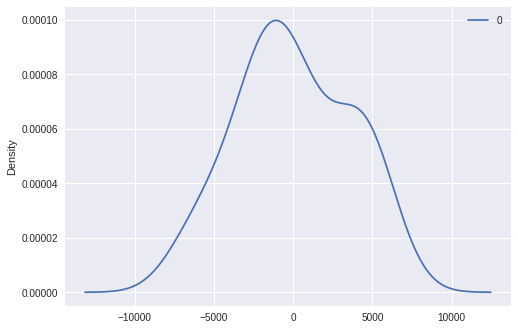

                 0
count    29.000000
mean     15.393595
std    3532.275307
min   -6743.177071
25%   -1798.659493
50%    -629.884903
75%    3449.550317
max    6063.872342



fit ran in: 1.103137493133545 sec


predict ran
predicted future value=18204.274193


predict ran in: 0.0014314651489257812 sec


__init__ ran in: 2.384185791015625e-06 sec


fit ran with arguments (3, [15988, 23646, 23029, 23255, 21660, 22639, 20418, 17606, 31214, 32611, 29834, 27416, 23380, 23550, 20950, 25477, 22376, 17316, 16298, 24809, 30444, 22871, 31241, 26043, 13331, 19041, 24609, 24226, 21177, 26686])



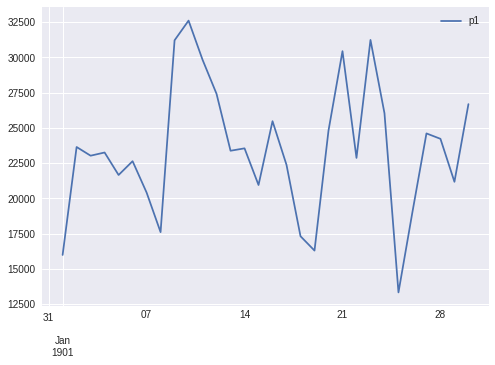

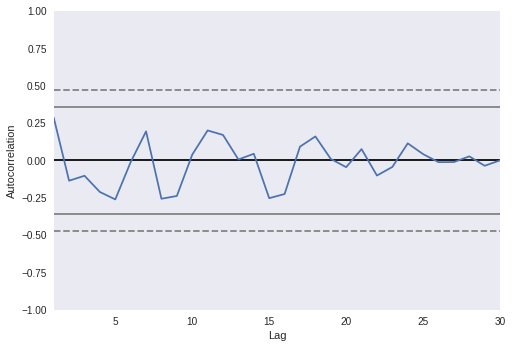

predicted [27195.27376103]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -288.154
Method:                       css-mle   S.D. of innovations           4969.354
Date:                Wed, 02 May 2018   AIC                            586.308
Time:                        05:00:28   BIC                            593.144
Sample:                             1   HQIC                           588.449
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        238.1493    584.558      0.407      0.687    -907.563    1383.862
ar.L1.D.y     -0.2021      0.196     -1.033      0.312      -0.586       0.181
ar.L2.D.y     -0.4032    

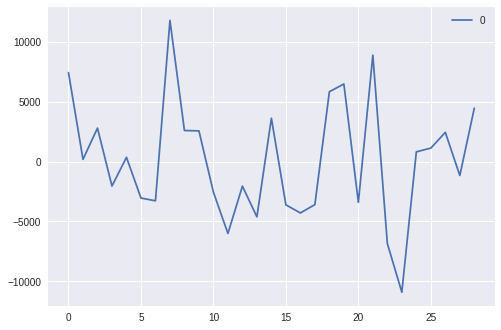

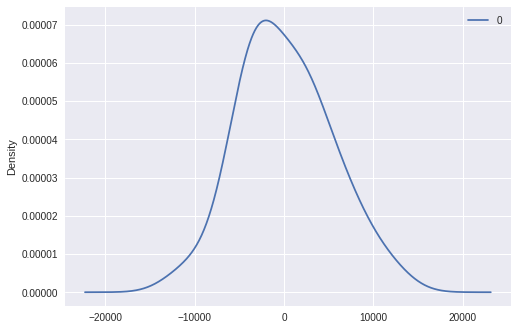

                  0
count     29.000000
mean     130.327455
std     5089.777687
min   -10907.820992
25%    -3407.434217
50%      178.667596
75%     2786.985791
max    11775.124008



fit ran in: 1.0110878944396973 sec


predict ran
predicted future value=27195.273761


predict ran in: 0.0015938282012939453 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [31977, 26428, 30931, 29867, 26144, 27601, 32568, 34594, 40628, 36327, 32808, 28998, 29939, 36534, 36201, 33926, 34478, 33032, 29556, 32407, 37876, 39057, 39577, 37666, 37334, 35178, 37467, 41757, 41157, 42316])



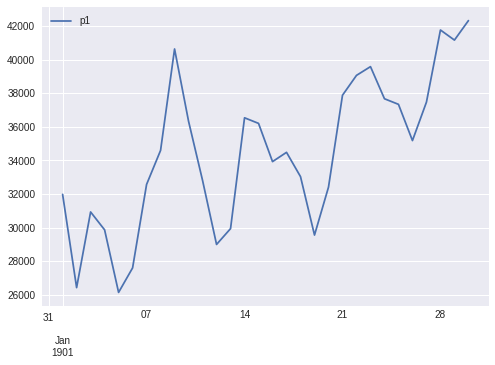

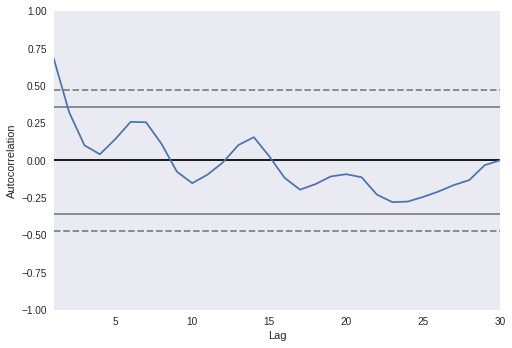

predicted [42122.05895191]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -274.242
Method:                       css-mle   S.D. of innovations           3080.701
Date:                Wed, 02 May 2018   AIC                            558.484
Time:                        05:00:29   BIC                            565.321
Sample:                             1   HQIC                           560.625
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        363.9625    408.364      0.891      0.381    -436.416    1164.341
ar.L1.D.y      0.0137      0.200      0.068      0.946      -0.378       0.406
ar.L2.D.y     -0.2493    

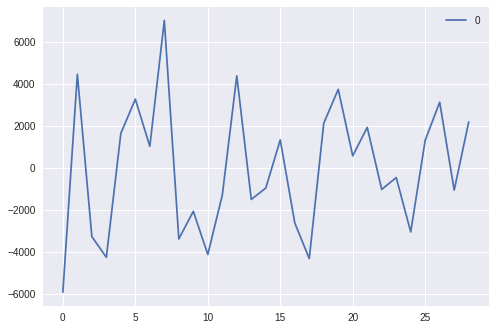

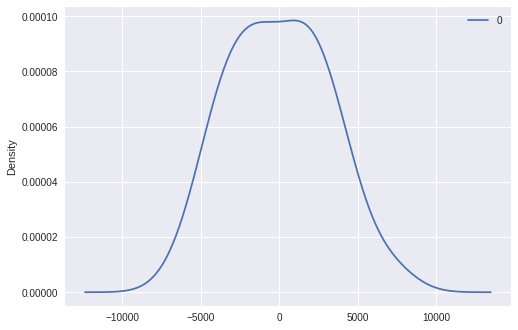

                 0
count    29.000000
mean    -38.031326
std    3171.874916
min   -5912.962471
25%   -2614.196699
50%    -457.555155
75%    2126.993724
max    7020.339491



fit ran in: 1.0991942882537842 sec


predict ran
predicted future value=42122.058952


predict ran in: 0.0022385120391845703 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [3166089, 3612226, 2881884, 3421379, 3578990, 3628487, 3594593, 3595380, 3452404, 3280475, 3209665, 3206831, 3075719, 3110281, 2946275, 3038849, 2927795, 2905299, 3095273, 3151996, 3254533, 3262962, 3151966, 3026427, 3080692, 3296611, 3247278, 3326148, 3283342, 3069545])



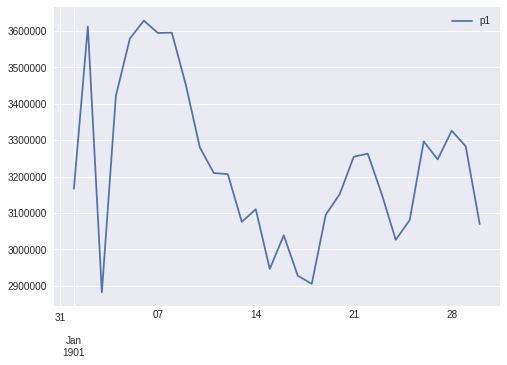

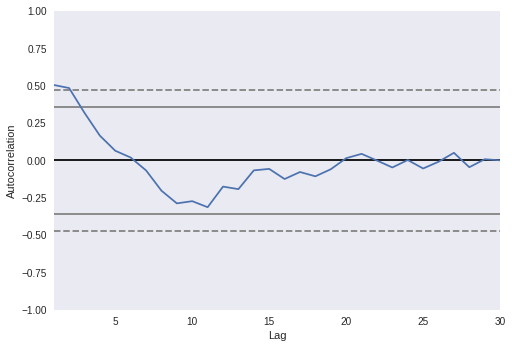

predicted [3164444.26477461]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -393.532
Method:                       css-mle   S.D. of innovations         188142.554
Date:                Wed, 02 May 2018   AIC                            797.064
Time:                        05:00:30   BIC                            803.901
Sample:                             1   HQIC                           799.205
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7301.4897    2.3e+04     -0.317      0.754   -5.24e+04    3.78e+04
ar.L1.D.y     -0.5186      0.187     -2.779      0.010      -0.884      -0.153
ar.L2.D.y      0.0118  

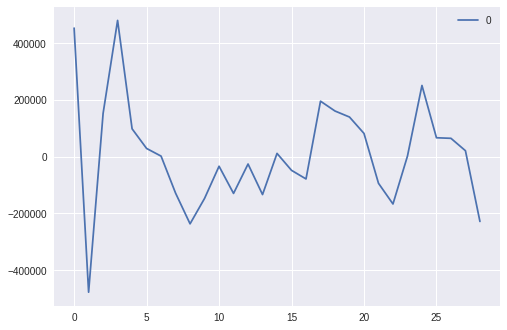

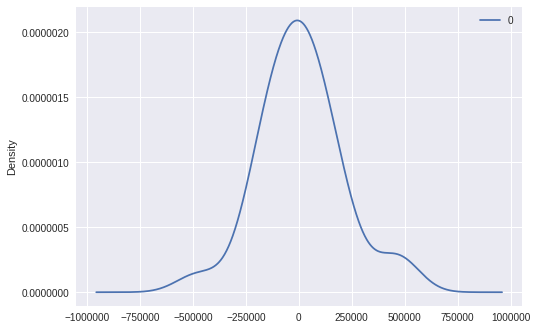

                   0
count      29.000000
mean     9951.047561
std    196903.244361
min   -477472.724899
25%   -128226.034994
50%      2294.875323
75%     98425.296440
max    480484.648201



fit ran in: 1.062939167022705 sec


predict ran
predicted future value=3164444.264775


predict ran in: 0.0013926029205322266 sec


__init__ ran in: 1.6689300537109375e-06 sec


fit ran with arguments (3, [41859, 65940, 67030, 62422, 67050, 101295, 84666, 64875, 48534, 49837, 40181, 41382, 45182, 33426, 31895, 28434, 27127, 22424, 23278, 29411, 27520, 26455, 27840, 25434, 19032, 17649, 22272, 21714, 20599, 22644])



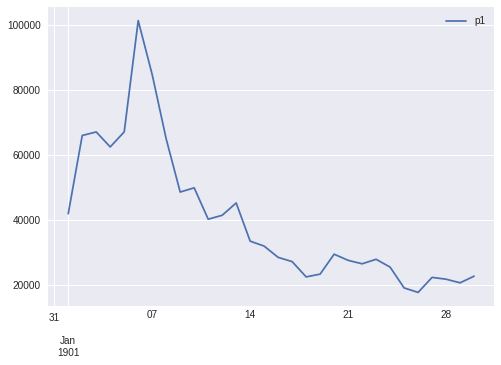

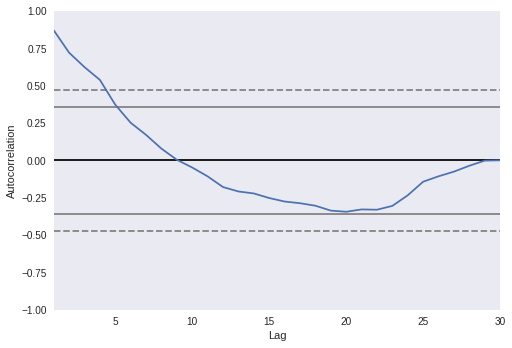

predicted [22037.87552167]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -308.337
Method:                       css-mle   S.D. of innovations          10002.950
Date:                Wed, 02 May 2018   AIC                            626.674
Time:                        05:00:31   BIC                            633.510
Sample:                             1   HQIC                           628.815
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -851.7751   1544.929     -0.551      0.586   -3879.781    2176.231
ar.L1.D.y      0.0635      0.206      0.308      0.761      -0.341       0.468
ar.L2.D.y     -0.2686    

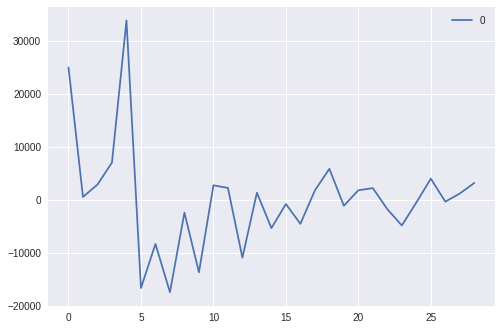

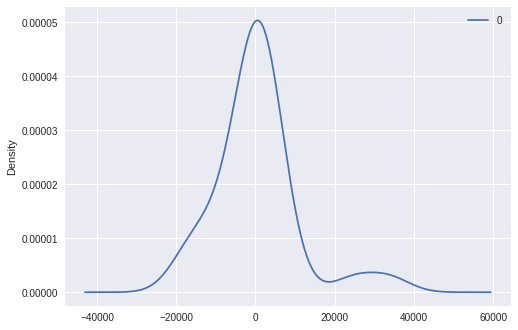

                  0
count     29.000000
mean     219.988069
std    10261.440747
min   -17435.024464
25%    -4544.112866
50%      530.403784
75%     2710.720549
max    33799.977695



fit ran in: 0.986077070236206 sec


predict ran
predicted future value=22037.875522


predict ran in: 0.0013320446014404297 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [14586, 15045, 14418, 15487, 8442, 6102, 7346, 6435, 10563, 9260, 7427, 8763, 32612, 43362, 33552, 34764, 22582, 25999, 32613, 28931, 30697, 28922, 21549, 33951, 41149, 31534, 32633, 31538, 27217, 28363])



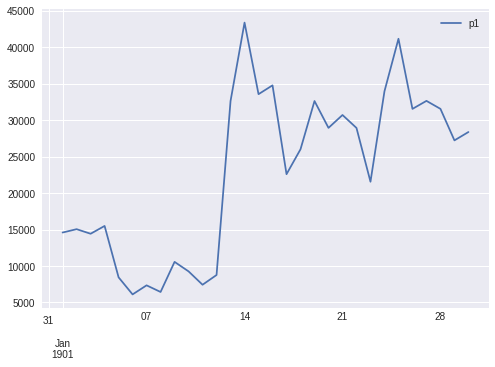

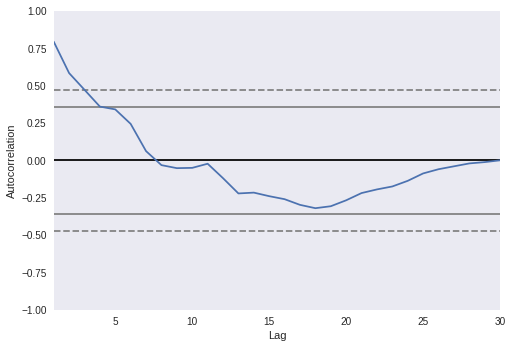

predicted [30183.14570186]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -297.111
Method:                       css-mle   S.D. of innovations           6793.009
Date:                Wed, 02 May 2018   AIC                            604.221
Time:                        05:00:32   BIC                            611.058
Sample:                             1   HQIC                           606.362
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4224   1030.420      0.498      0.623   -1506.163    2533.008
ar.L1.D.y      0.0210      0.184      0.114      0.910      -0.340       0.382
ar.L2.D.y     -0.2697    

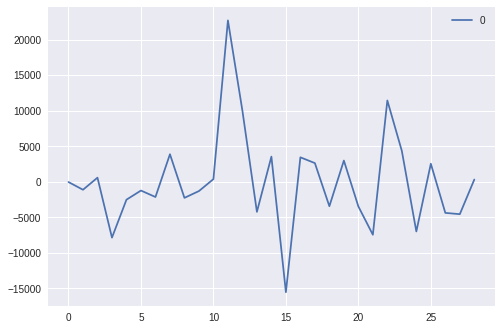

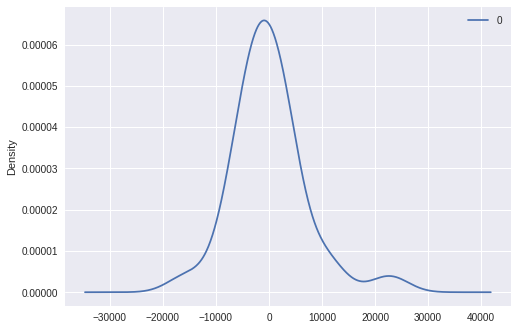

                  0
count     29.000000
mean      -9.494071
std     6913.486468
min   -15561.606135
25%    -3486.296505
50%    -1139.597223
75%     2967.205258
max    22697.297582



fit ran in: 1.091019630432129 sec


predict ran
predicted future value=30183.145702


predict ran in: 0.0014066696166992188 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [24159, 21502, 23526, 28600, 28255, 28431, 30295, 29082, 22989, 24346, 28906, 27842, 26519, 27036, 25793, 22421, 24309, 26845, 25246, 28104, 29814, 28303, 24059, 27514, 32436, 30657, 31052, 32093, 28165, 22874])



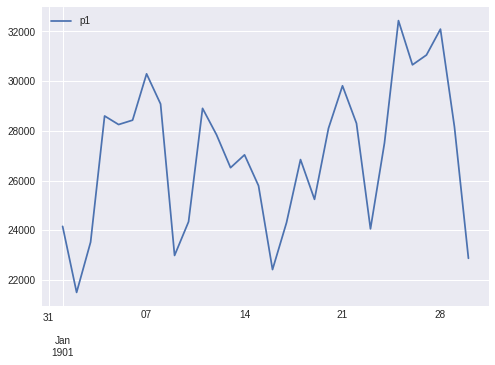

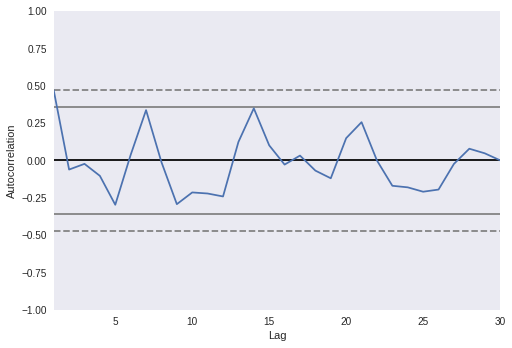

predicted [24268.05922933]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -265.848
Method:                       css-mle   S.D. of innovations           2273.210
Date:                Wed, 02 May 2018   AIC                            541.696
Time:                        05:00:33   BIC                            548.533
Sample:                             1   HQIC                           543.837
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6906    421.728      0.104      0.918    -782.880     870.262
ar.L1.D.y      0.2429      0.189      1.282      0.211      -0.128       0.614
ar.L2.D.y     -0.5828    

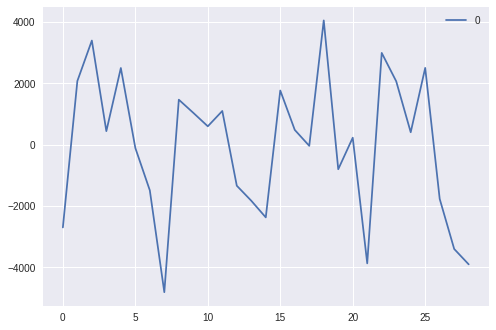

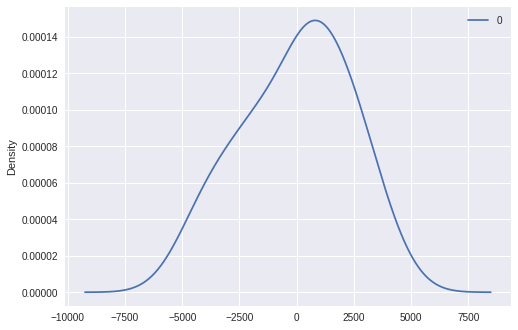

                 0
count    29.000000
mean    -46.283945
std    2357.669660
min   -4814.438606
25%   -1770.334886
50%     404.564304
75%    1766.801210
max    4053.473073



fit ran in: 1.016205072402954 sec


predict ran
predicted future value=24268.059229


predict ran in: 0.0014219284057617188 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [268761, 226644, 202903, 201372, 191240, 198024, 267412, 289817, 233144, 210205, 178994, 155626, 248158, 252471, 291896, 301777, 217711, 200980, 185491, 183430, 215310, 227871, 182765, 168251, 154917, 143351, 133672, 165432, 184370, 158707])



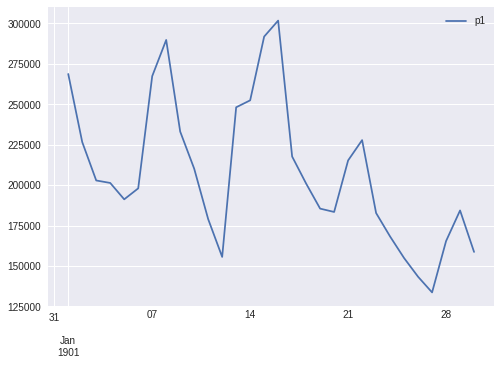

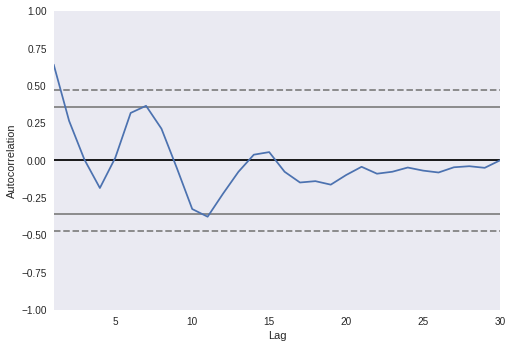

predicted [143519.46108274]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -343.818
Method:                       css-mle   S.D. of innovations          34004.667
Date:                Wed, 02 May 2018   AIC                            697.636
Time:                        05:00:34   BIC                            704.473
Sample:                             1   HQIC                           699.777
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3651.9453   5476.480     -0.667      0.511   -1.44e+04    7081.757
ar.L1.D.y      0.1330      0.186      0.713      0.482      -0.232       0.498
ar.L2.D.y     -0.1870   

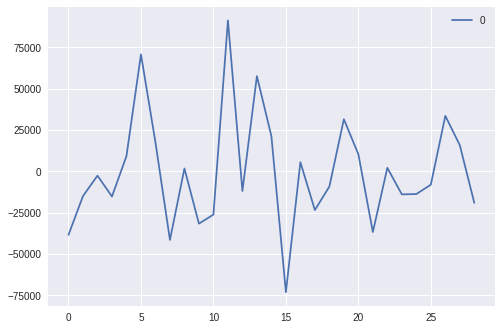

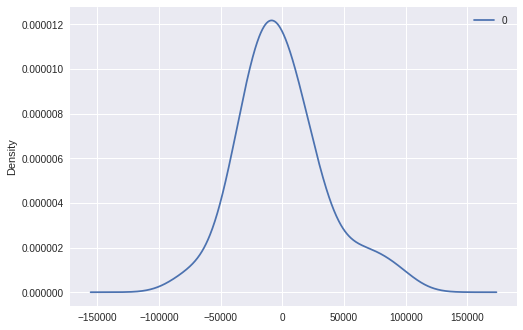

                  0
count     29.000000
mean    -437.189101
std    34666.623918
min   -73173.308908
25%   -19140.402959
50%    -8129.624771
75%    15773.375285
max    91265.338624



fit ran in: 1.0227208137512207 sec


predict ran
predicted future value=143519.461083


predict ran in: 0.0013234615325927734 sec


__init__ ran in: 2.1457672119140625e-06 sec


fit ran with arguments (3, [305612, 302201, 279930, 260691, 217624, 160977, 215527, 284858, 266054, 257197, 243647, 200695, 147070, 196671, 252610, 245556, 249167, 235139, 207565, 146888, 176367, 232367, 212906, 190481, 173051, 149319, 110361, 138222, 193611, 180049])



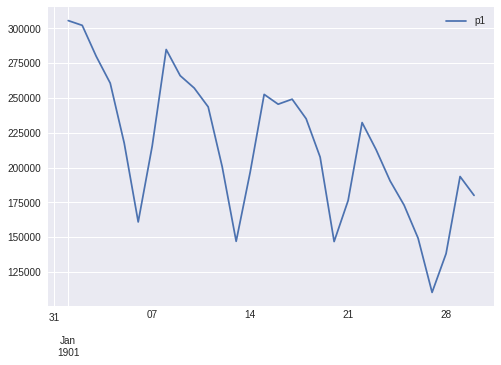

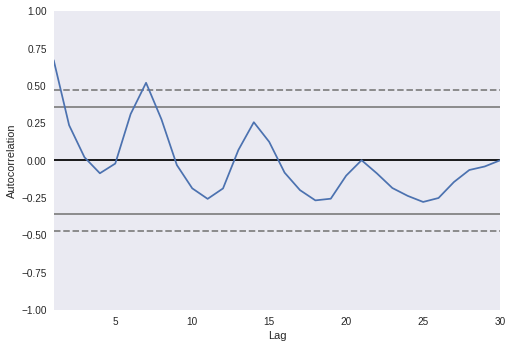

predicted [141671.26292984]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -341.396
Method:                       css-mle   S.D. of innovations          31002.310
Date:                Wed, 02 May 2018   AIC                            692.792
Time:                        05:00:35   BIC                            699.629
Sample:                             1   HQIC                           694.933
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4893.0755   5081.744     -0.963      0.345   -1.49e+04    5066.959
ar.L1.D.y      0.3347      0.186      1.802      0.084      -0.029       0.699
ar.L2.D.y     -0.5285   

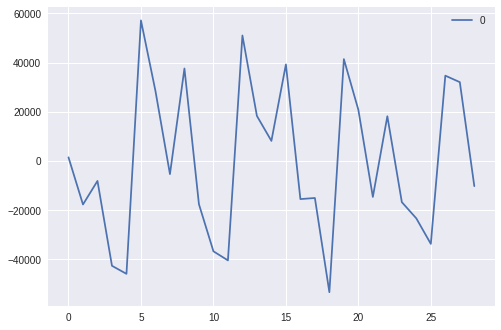

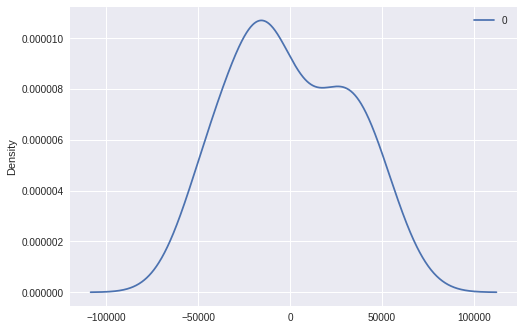

                  0
count     29.000000
mean    -283.090908
std    31597.515275
min   -53349.749799
25%   -17685.507235
50%    -8112.556793
75%    28460.778222
max    57151.737201



fit ran in: 1.0591890811920166 sec


predict ran
predicted future value=141671.262930


predict ran in: 0.0013782978057861328 sec


__init__ ran in: 1.9073486328125e-06 sec


fit ran with arguments (3, [176704, 237519, 219852, 211973, 202701, 175408, 139700, 191837, 243161, 237931, 219984, 194502, 165109, 133597, 194239, 220393, 209988, 201083, 190071, 155357, 130214, 185792, 221262, 210200, 199335, 186937, 155093, 133439, 186395, 215085])



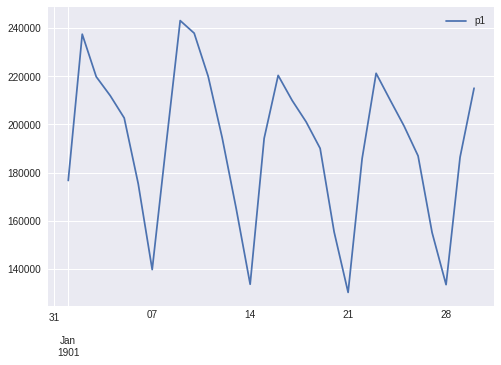

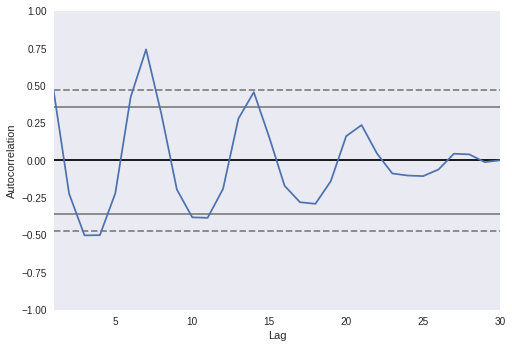

predicted [201093.25598606]
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -338.315
Method:                       css-mle   S.D. of innovations          27886.764
Date:                Wed, 02 May 2018   AIC                            686.630
Time:                        05:00:36   BIC                            693.467
Sample:                             1   HQIC                           688.771
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.1780   4121.707      0.032      0.974   -7945.219    8211.575
ar.L1.D.y      0.2689      0.203      1.326      0.197      -0.129       0.666
ar.L2.D.y     -0.4590   

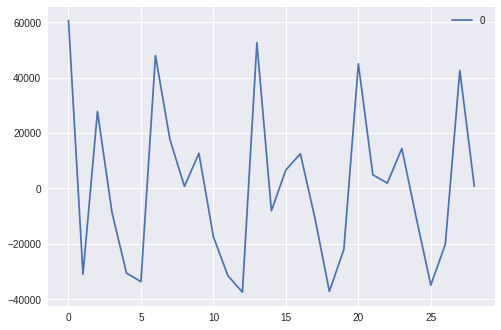

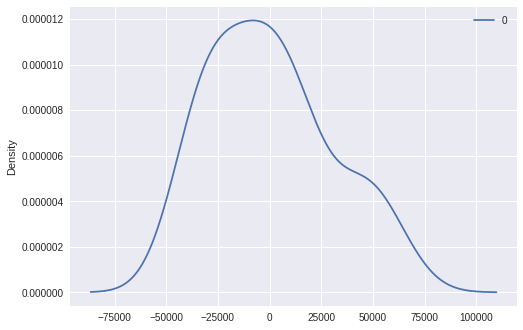

                  0
count     29.000000
mean     515.357014
std    29195.289731
min   -37486.867989
25%   -22032.681686
50%      724.885358
75%    14441.569847
max    60681.821967



fit ran in: 1.031015157699585 sec


predict ran
predicted future value=201093.255986


predict ran in: 0.0014500617980957031 sec


calc ran with arguments ([18204, 27195, 42122, 3164444, 22037, 30183, 24268, 143519, 141671, 201093], [13019, 26266, 40993, 3005058, 22685, 33372, 25496, 145638, 166472, 201760], [(30, 442755, 14758.5, 3577.1019345274467), (30, 703141, 23438.033333333333, 4697.761938649321), (30, 1034329, 34477.63333333333, 4484.658191979505), (30, 96879394, 3229313.1333333333, 215886.3940566478), (30, 1207407, 40246.9, 21041.77892249924), (30, 685842, 22861.4, 11244.981217117853), (30, 811173, 27039.1, 2918.7904726672887), (30, 6240702, 208023.4, 44571.75808782956), (30, 6432413, 214413.76666666666, 50295.37056806411), (30, 5744861, 191495.36666666667, 31246.922644727038)])

0 is Y^-Y smaller 

In [6]:
#The solution

if __name__ == '__main__':
  #get data.
  products, results = productResults()
  print(products,results)

  #print some statistics.
  stats = statistics(products)
  print(stats)

  #plot the data.
  plotHistograms(products)

  #train and predict
  AR = [3,3,3,3,3,3,3,3,3,3]
  finalPredictions = []
  models = []
  for i, product in enumerate(products):
    tm = TheModel(1)
    tm.fit(AR[i], product, False)
    predictedValue = tm.predict()
    finalPredictions.append(predictedValue)
    models.append(tm)
    
  #for each prediction, are we within stdev?
  smallerThanSTDs = calc(finalPredictions, results, stats)
    
  print('predicted values:',finalPredictions)  
  print()
  print('expected values:', results)
  print()
  print('predicted values within STDEV?', smallerThanSTDs)
